<a href="https://colab.research.google.com/github/ZHAO0428/zhao0428.github.io/blob/main/L4_uninformed_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIDM7340 AI for Digital Media
# Search Algorithms

## Tutorial: Uninformed Search
Implementation of the basic uninformed search algorithms using `NetworkX` library

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
import pandas as pd
import numpy as np

### Basic graphs

Create a basic undirected graph.

In [ ]:
G = nx.Graph()

print(G.nodes())
print(G.edges())

print(type(G.nodes()))
print(type(G.edges()))

[]
[]
<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


### Add edges to the graph
Add edges from a list of tuples.

In [ ]:
# adding a list of edges:
G.add_edges_from([
    ('S','A'),('S','D'),
    ('A','D'),('A','B'),
    ('B','C'),('B','E'),
    ('D','E'),
    ('E','F'),
    ('F','G')
])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['S', 'A', 'D', 'B', 'C', 'E', 'F', 'G']
Edges of graph: 
[('S', 'A'), ('S', 'D'), ('A', 'D'), ('A', 'B'), ('D', 'E'), ('B', 'C'), ('B', 'E'), ('E', 'F'), ('F', 'G')]


### Visualise a graph
Basic visualisation

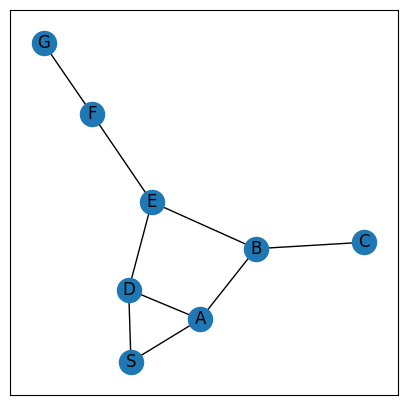

In [ ]:
plt.figure(figsize=(5, 5))
nx.draw_networkx(G)

Let's try changing the network layout ([nx.spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)) and node shape

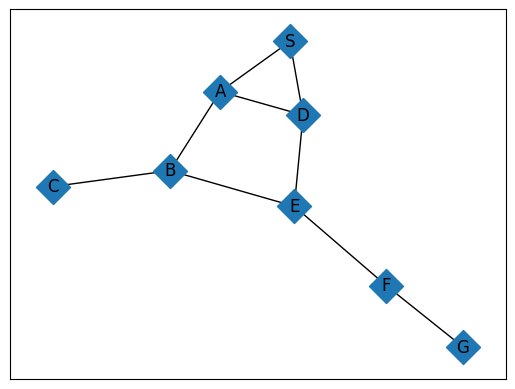

In [ ]:
layout = nx.spring_layout(G)
nx.draw_networkx(G, layout, node_shape='D', with_labels=True)

# Visit the graph using Depth First Algorithm

## Using NetworkX build-in functions
Get a list of the edges that have been visited from a starting node. Use DFS algorithm.

In [ ]:
nx.dfs_edges?

In [ ]:
print(list(nx.dfs_edges(G, 'S')))

[('S', 'A'), ('A', 'D'), ('D', 'E'), ('E', 'B'), ('B', 'C'), ('E', 'F'), ('F', 'G')]


Create the tree from the visit starting from node `S`.

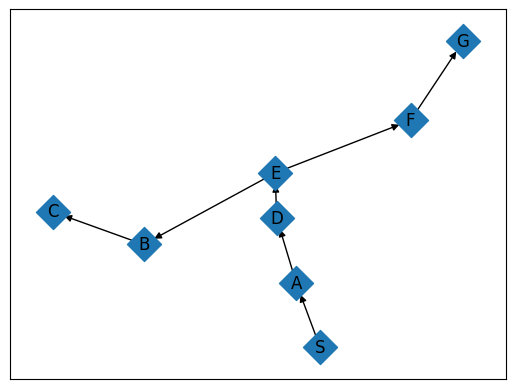

In [ ]:
visitedTree = nx.dfs_tree(G, 'S')
layout = nx.spring_layout(visitedTree)
nx.draw_networkx(visitedTree, layout, node_shape='D', with_labels=True)

**TEST**: Will the tree be different if the visit starts from a different node?
Create the visit tree starting from node `B`.

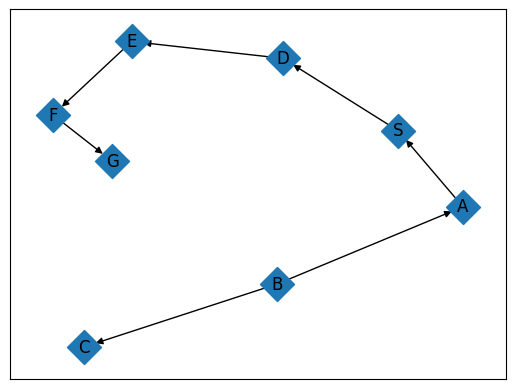

In [ ]:
visitedTree = nx.dfs_tree(G, 'B')
layout = nx.spring_layout(visitedTree)
nx.draw_networkx(visitedTree, layout, node_shape='D', with_labels=True)

### Pro and Cons of this approach.

Pro:
- easy to program
- we create a `NetworkX` tree object where we can use additional builtin functions

Cons:
- cannot specify the goal node
- we don't know the sequence order of the visit

## Using our algorithm

### Basic DFS
We first implement the DFS using tree-search algorithm.

In [ ]:
def DFS(graph, startNode, endNode, maxSteps):
    # Initialisation
    frontier = []
    step = 0
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False # node attribute: parent

    # Setup starting point, root of the tree
    frontier.append(startNode)
    graph.nodes[startNode]['parent'] = None

    # Execute until there are no nodes to be visited
    while frontier:
        print('Frontier:', frontier)

        #Extract a node from the frontier and visit the node
        currentNode = frontier.pop() # pop method removes last item and returns it
        step += 1
#         step = step + 1

        # Goal test
        if not (currentNode == endNode):
            # Check condition
            if step <= maxSteps:
                print(currentNode, " -> ")

                # Add neighbouring nodes to frontier
                for neighbour in graph.adj[currentNode]:
                    frontier.append(neighbour)
                    graph.nodes[neighbour]['parent'] = currentNode
            else:
                print("Execution ended without reaching the goal")
                break
        else:
            print(currentNode, " *GOAL* - Number of steps:", step)
            break

    print("- End")

In [ ]:
DFS_graph = G.copy()
DFS(DFS_graph, 'S', 'G', 100)

Frontier: ['S']
S  -> 
Frontier: ['A', 'D']
D  -> 
Frontier: ['A', 'S', 'A', 'E']
E  -> 
Frontier: ['A', 'S', 'A', 'D', 'B', 'F']
F  -> 
Frontier: ['A', 'S', 'A', 'D', 'B', 'E', 'G']
G  *GOAL* - Number of steps: 5
- End


In [ ]:
print(DFS_graph.nodes(data=True))

[('S', {'parent': 'D'}), ('A', {'parent': 'D'}), ('D', {'parent': 'E'}), ('B', {'parent': 'E'}), ('C', {'parent': False}), ('E', {'parent': 'F'}), ('F', {'parent': 'E'}), ('G', {'parent': 'F'})]


### Improved DFS
In the following, we implement the DFS graph search algorithm.
`visited` attribute is used to memorize the state of each node.

In [ ]:
def DFS_with_loop_prevention(graph, startNode, endNode, maxSteps):
    # Initialization
    # Use visited flag on each node to find if we should consider it for following expansion
    frontier = []
    step = 0
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False # node attribute: parent
        graph.nodes[node]['visited'] = False # node attribute: visited


    # Setup starting point, root of the tree
    frontier.append(startNode)
    graph.nodes[startNode]['parent'] = None
    print(startNode, " -> ")

    # Execute until there are nodes to be visited
    while frontier:
        print('Frontier:', frontier)

        #Extract a node from the frontier and visit the node
        currentNode = frontier.pop() # pop method removes last item and returns it
        if graph.nodes[currentNode]['visited'] == False: # Why this is needed????
            step += 1

            # Goal test
            if not (currentNode == endNode):
                # Check condition
                if step <= maxSteps:
                    # Update the visited flag if needed
                    if (not graph.nodes[currentNode]['visited']):
                        print("current node: ", currentNode, " -> ")
                        graph.nodes[currentNode]['visited'] = True

                    # Add neighbouring nodes to frontier, if not visited
                    for neighbour in graph.adj[currentNode]:
                        if (not graph.nodes[neighbour]['visited']) and (neighbour not in frontier):
                            frontier.append(neighbour)
                            graph.nodes[neighbour]['parent'] = currentNode
                else:
                    print(" Execution ended without reaching the goal")
                    break
            else:
                print(currentNode, " *GOAL* - Number of steps:", step)
                break

    print(" - End")

In [ ]:
DFS_graph = G.copy()
DFS_with_loop_prevention(DFS_graph, 'S', 'G', 100)

S  -> 
Frontier: ['S']
current node:  S  -> 
Frontier: ['A', 'D']
current node:  D  -> 
Frontier: ['A', 'E']
current node:  E  -> 
Frontier: ['A', 'B', 'F']
current node:  F  -> 
Frontier: ['A', 'B', 'G']
G  *GOAL* - Number of steps: 5
 - End


In [ ]:
print(DFS_graph.nodes(data=True))

[('S', {'parent': None, 'visited': True}), ('A', {'parent': 'S', 'visited': False}), ('D', {'parent': 'S', 'visited': True}), ('B', {'parent': 'E', 'visited': False}), ('C', {'parent': False, 'visited': False}), ('E', {'parent': 'D', 'visited': True}), ('F', {'parent': 'E', 'visited': True}), ('G', {'parent': 'F', 'visited': False})]


# Visit using Breadth First Algorithm

## Using NetworkX builtin functions for BFS
Get a list of the edges that have been visited from a starting node. Use BFS algorithm.

In [ ]:
print(list(nx.bfs_edges(G, 'S')))

[('S', 'A'), ('S', 'D'), ('A', 'B'), ('D', 'E'), ('B', 'C'), ('E', 'F'), ('F', 'G')]


Create the visit tree starting from node `S`.

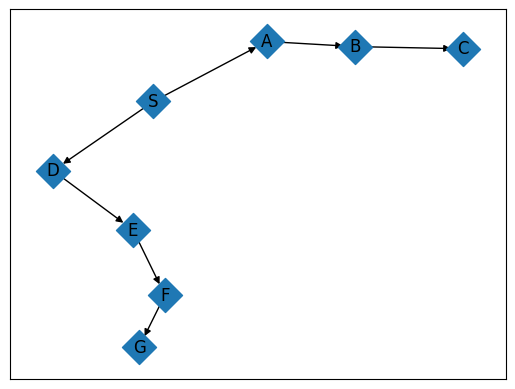

In [ ]:
visitedTree = nx.bfs_tree(G, 'S')
layout = nx.spring_layout(visitedTree)
nx.draw_networkx(visitedTree, layout, node_shape='D', with_labels=True)

Create the visit tree starting from node `B`.

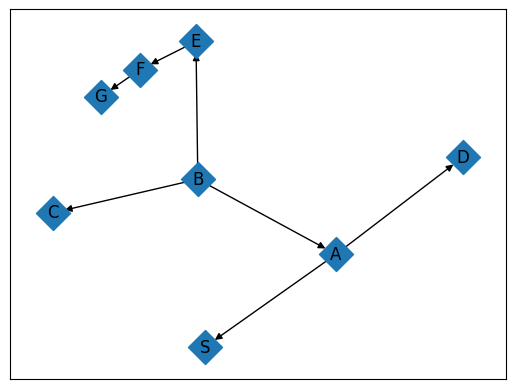

In [ ]:
visitedTree = nx.bfs_tree(G, 'B')
layout = nx.spring_layout(visitedTree)
nx.draw_networkx(visitedTree, layout, node_shape='D', with_labels=True)

## Using our algorithm

### BFS (graph search)
`visited` attribute is used to memorize the state of each node.

A double-ended queue, or `deque`, has the feature of adding and removing elements from either end.

In [ ]:
from collections import deque

def BFS(graph, startNode, endNode, maxLevel):
    # Initialization
    frontier = deque()
    level = 0
    for node in graph.nodes:
        graph.nodes[node]['visited'] = False
        graph.nodes[node]['level'] = None

    # Add starting node to the frontier as root of the tree
    frontier.append(startNode)
    graph.nodes[startNode]['level'] = level

    # Execute until there are no nodes to be visited
    while frontier:
        print('Frontier:', frontier)

        #Extract a node from the frontier and visit the node
        currentNode = frontier.popleft() # Why left????

        # Implement the visited strategy to avoid visiting nodes multiple times
        graph.nodes[currentNode]['visited'] = True

        # Goal test
        if not (currentNode == endNode):
            print("current node: ", currentNode, " -> ")

            #Add neighbours to the frontier, if not already visited
            for neighbour in graph.adj[currentNode]:
                if not graph.nodes[neighbour]['visited']:
                    if neighbour not in frontier:
                        frontier.append(neighbour)
                        level = graph.nodes[currentNode]['level'] + 1
                        graph.nodes[neighbour]['level'] = level
        else:
            print(currentNode, " *GOAL* - Depth:", level)
            break

    print("End")

In [ ]:
BFS_graph = G.copy()
BFS(BFS_graph, 'S', 'G', 100)

Frontier: deque(['S'])
current node:  S  -> 
Frontier: deque(['A', 'D'])
current node:  A  -> 
Frontier: deque(['D', 'B'])
current node:  D  -> 
Frontier: deque(['B', 'E'])
current node:  B  -> 
Frontier: deque(['E', 'C'])
current node:  E  -> 
Frontier: deque(['C', 'F'])
current node:  C  -> 
Frontier: deque(['F'])
current node:  F  -> 
Frontier: deque(['G'])
G  *GOAL* - Depth: 4
End


In [ ]:
print(BFS_graph.nodes(data=True))

[('S', {'visited': True, 'level': 0}), ('A', {'visited': True, 'level': 1}), ('D', {'visited': True, 'level': 1}), ('B', {'visited': True, 'level': 2}), ('C', {'visited': True, 'level': 3}), ('E', {'visited': True, 'level': 2}), ('F', {'visited': True, 'level': 3}), ('G', {'visited': True, 'level': 4})]


# A more complex example
We will use a real case example of map navigation where we can have a good comparison of different search algorithms.

## Romania road map graph
Import the adjacency matrix from `romania.csv` file.

In [ ]:
data_url = 'https://raw.githubusercontent.com/xiaoyifu777/AIDM7370/main/romania.csv'
dfRomania = pd.read_csv(data_url)
dfRomania.head()

,city,Arad,Bucharest,Craiova,Drobeta,Eforie,Fagaras,Giurgiu,Hirsova,Iasi,...,Mehadia,Neamt,Oradea,Pitesti,Rimnicu,Sibiu,Timisoara,Urziceni,Vaslui,Zerind
0,Arad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,140.0,118.0,NaN,NaN,75.0
1,Bucharest,NaN,NaN,NaN,NaN,NaN,211.0,90.0,NaN,NaN,...,NaN,NaN,NaN,101.0,NaN,NaN,NaN,85.0,NaN,NaN
2,Craiova,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,138.0,146.0,NaN,NaN,NaN,NaN,NaN
3,Drobeta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eforie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfRomania.shape

(20, 21)

Change NA to 0, needed for NetworkX graph.

In [ ]:
dfRomania.fillna(0, inplace=True)
dfRomania.set_index('city', inplace=True)
dfRomania

,Arad,Bucharest,Craiova,Drobeta,Eforie,Fagaras,Giurgiu,Hirsova,Iasi,Lugoj,Mehadia,Neamt,Oradea,Pitesti,Rimnicu,Sibiu,Timisoara,Urziceni,Vaslui,Zerind
city,,,,,,,,,,,,,,,,,,,,
Arad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,118.0,0.0,0.0,75.0
Bucharest,0.0,0.0,0.0,0.0,0.0,211.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,85.0,0.0,0.0
Craiova,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,146.0,0.0,0.0,0.0,0.0,0.0
Drobeta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eforie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fagaras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0
Giurgiu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hirsova,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0
Iasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0


Convert Pandas `DataFrame` to NetworkX Graph

In [ ]:
romaniaMap = nx.from_pandas_adjacency(dfRomania, nx.Graph)

In [ ]:
romaniaMap.edges(data=True)

EdgeDataView([('Arad', 'Sibiu', {'weight': 140.0}), ('Arad', 'Timisoara', {'weight': 118.0}), ('Arad', 'Zerind', {'weight': 75.0}), ('Bucharest', 'Fagaras', {'weight': 211.0}), ('Bucharest', 'Giurgiu', {'weight': 90.0}), ('Bucharest', 'Pitesti', {'weight': 101.0}), ('Bucharest', 'Urziceni', {'weight': 85.0}), ('Craiova', 'Drobeta', {'weight': 120.0}), ('Craiova', 'Pitesti', {'weight': 138.0}), ('Craiova', 'Rimnicu', {'weight': 146.0}), ('Drobeta', 'Mehadia', {'weight': 75.0}), ('Eforie', 'Hirsova', {'weight': 86.0}), ('Fagaras', 'Sibiu', {'weight': 99.0}), ('Hirsova', 'Urziceni', {'weight': 98.0}), ('Iasi', 'Neamt', {'weight': 87.0}), ('Iasi', 'Vaslui', {'weight': 92.0}), ('Lugoj', 'Mehadia', {'weight': 70.0}), ('Lugoj', 'Timisoara', {'weight': 111.0}), ('Oradea', 'Sibiu', {'weight': 151.0}), ('Oradea', 'Zerind', {'weight': 71.0}), ('Pitesti', 'Rimnicu', {'weight': 97.0}), ('Rimnicu', 'Sibiu', {'weight': 80.0}), ('Urziceni', 'Vaslui', {'weight': 142.0})])

Display the roadmap

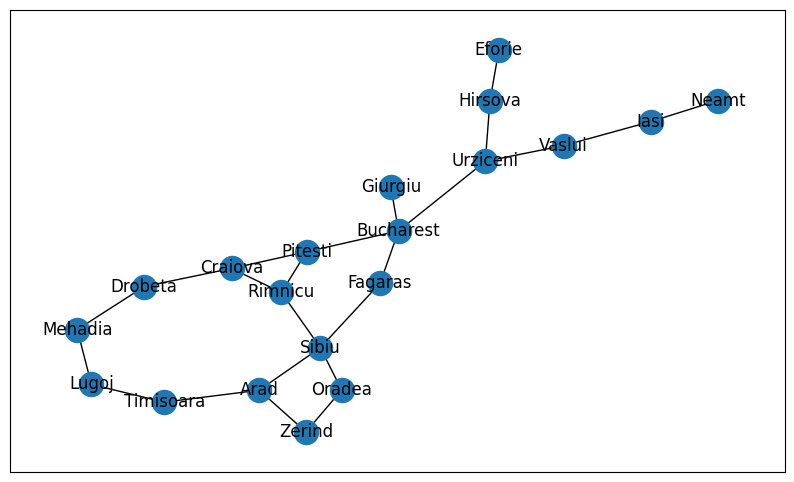

In [ ]:
plt.figure(figsize=(10, 6))
layout = nx.spring_layout(romaniaMap)
nx.draw_networkx(romaniaMap, layout, with_labels=True)

## Visit the graph using the various strategies

In [ ]:
DFS(romaniaMap, 'Arad', 'Bucharest', 100)

Frontier: ['Arad']
Arad  -> 
Frontier: ['Sibiu', 'Timisoara', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 

In [ ]:
DFS_with_loop_prevention(romaniaMap, 'Arad', 'Bucharest', 100)

Arad  -> 
Frontier: ['Arad']
current node:  Arad  -> 
Frontier: ['Sibiu', 'Timisoara', 'Zerind']
current node:  Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Oradea']
current node:  Oradea  -> 
Frontier: ['Sibiu', 'Timisoara']
current node:  Timisoara  -> 
Frontier: ['Sibiu', 'Lugoj']
current node:  Lugoj  -> 
Frontier: ['Sibiu', 'Mehadia']
current node:  Mehadia  -> 
Frontier: ['Sibiu', 'Drobeta']
current node:  Drobeta  -> 
Frontier: ['Sibiu', 'Craiova']
current node:  Craiova  -> 
Frontier: ['Sibiu', 'Pitesti', 'Rimnicu']
current node:  Rimnicu  -> 
Frontier: ['Sibiu', 'Pitesti']
current node:  Pitesti  -> 
Frontier: ['Sibiu', 'Bucharest']
Bucharest  *GOAL* - Number of steps: 11
 - End


In [ ]:
BFS(romaniaMap, 'Arad', 'Bucharest', 100)

Frontier: deque(['Arad'])
current node:  Arad  -> 
Frontier: deque(['Sibiu', 'Timisoara', 'Zerind'])
current node:  Sibiu  -> 
Frontier: deque(['Timisoara', 'Zerind', 'Fagaras', 'Oradea', 'Rimnicu'])
current node:  Timisoara  -> 
Frontier: deque(['Zerind', 'Fagaras', 'Oradea', 'Rimnicu', 'Lugoj'])
current node:  Zerind  -> 
Frontier: deque(['Fagaras', 'Oradea', 'Rimnicu', 'Lugoj'])
current node:  Fagaras  -> 
Frontier: deque(['Oradea', 'Rimnicu', 'Lugoj', 'Bucharest'])
current node:  Oradea  -> 
Frontier: deque(['Rimnicu', 'Lugoj', 'Bucharest'])
current node:  Rimnicu  -> 
Frontier: deque(['Lugoj', 'Bucharest', 'Craiova', 'Pitesti'])
current node:  Lugoj  -> 
Frontier: deque(['Bucharest', 'Craiova', 'Pitesti', 'Mehadia'])
Bucharest  *GOAL* - Depth: 3
End


- The codes in this notebook take insipiration from various sources. All codes are for educational purposes only and released under the CC1.0.